
### Objective          :  Get 0.69 score  https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/leaderboard and convert to a Keras Tutorial

### Details              :  https://github.com/LamUong/FacialExpressionRecognition
### Current Status :  64.27

### Some observaions

#### the test accuracy and private leader board accuracy are very close

#### after 300 trials there sees to have over fitting

In [1]:
from __future__ import print_function

import cv2
import PIL
from PIL import Image
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.layers import AveragePooling2D
from keras.optimizers import Adadelta ,SGD , Adam
from keras.utils import np_utils
#from keras.regularizers import l2, activity_l2
from keras.regularizers import l2, l1
from keras.layers import deserialize as layer_from_config
import numpy as np
import _pickle as cPickle
import numpy
import cv2
import scipy
import csv
import dataprocessing
from numpy import array

import keras.backend as K

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
K.clear_session()

In [3]:
#Additional imports when needed

from keras.callbacks import ModelCheckpoint

In [4]:
#weights.{epoch:02d}-{val_loss:.2f}.hdf5

In [6]:
#This should be the only place where we should be changing file name
file_prefix = "FaceExp_Reco_tr_21_v01_"  #"FaceExp_Reco_tr_14.best.hdf5"
is_running_on_sub_samples = False

## Define the model

#### Try a custom model

In [7]:
#def my_func(arg):
#    arg = tf.convert_to_tensor(arg, dtype=tf.float32)
#    return arg

In [8]:


def cce_rmse_svm(y_true, y_pred):
    
    ce_loss = K.categorical_crossentropy(y_true, y_pred)
    
    rmse_loss = K.sqrt(K.mean(K.square((y_pred - y_true)*(1 - y_true)), axis=-1))
    
    c_166667 = K.constant(0.166667)
    c_1      = K.constant(1.0)
    return (ce_loss - K.log(c_1 - (rmse_loss/c_166667)))

In [9]:
keras.optimizers.Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)
keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0)
keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [10]:
def rmse_svm(y_true, y_pred):
        
    ce_loss = 0.0
    
    rmse_loss = K.sqrt(K.mean(K.square((y_pred - y_true)*(1 - y_true)), axis=-1))
    
    return (ce_loss - K.log(1- rmse_loss))
    #return (ce_loss + rmse_loss)

In [11]:
def cce_svm(y_true, y_pred):
        
    ce_loss = K.categorical_crossentropy(y_true, y_pred)
    
    rmse_loss = 0.0
    
    return (ce_loss + rmse_loss)

#### Test the custom cost function

In [12]:
def model_generate():
    img_rows, img_cols = 48, 48

    model = Sequential()
    model.add(Convolution2D(128, kernel_size=(5, 5), padding='same', input_shape=(img_rows, img_cols, 1)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))
    
    model.add(Convolution2D(128, kernel_size=(3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())  
    model.add(Dropout(0.2))
    
    model.add(Convolution2D(128, kernel_size=(3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization()) 
    
    model.add(AveragePooling2D(pool_size=(3, 3),strides=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Convolution2D(128, kernel_size=(3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Convolution2D(128, kernel_size=(3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
    model.add(AveragePooling2D(pool_size=(3, 3),strides=(2, 2)))
    model.add(Dropout(0.2))
    #model.add(Conv2D(512, 3, 3))
    #model.add(Activation('relu'))
    #model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(7))
    model.add(Activation('softmax'))

    #ada = Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    #adam = keras.optimizers.Adam(lr=0.001)
    
    model.compile(loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy', cce_svm, rmse_svm, cce_rmse_svm])
    
    model.summary()
    
    return model

In [13]:
def model_generate():
    img_rows, img_cols = 48, 48

    model = Sequential()
    model.add(Convolution2D(128, kernel_size=(5, 5), padding='same', input_shape=(img_rows, img_cols, 1)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))
    
    model.add(Convolution2D(128, kernel_size=(3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())  
    model.add(Dropout(0.3))
    
    model.add(Convolution2D(128, kernel_size=(3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization()) 
    
    model.add(AveragePooling2D(pool_size=(3, 3),strides=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Convolution2D(256, kernel_size=(3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Convolution2D(256, kernel_size=(3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
    model.add(AveragePooling2D(pool_size=(3, 3),strides=(2, 2)))
    model.add(Dropout(0.3))
    #model.add(Conv2D(512, 3, 3))
    #model.add(Activation('relu'))
    #model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(7))
    model.add(Activation('softmax'))

    #ada = Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    #adam = keras.optimizers.Adam(lr=0.001)
    adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    
    model.compile(loss=cce_rmse_svm,
    optimizer=sgd,
    metrics=['accuracy', cce_svm, rmse_svm, cce_rmse_svm])
    
    model.summary()
    
    return model

In [14]:
from  clr_callback  import *
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994, step_size= 1000)

In [15]:
from keras.callbacks import ReduceLROnPlateau 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

In [41]:
def model_generate():
    img_rows, img_cols = 48, 48

    model = Sequential()
    model.add(Convolution2D(128, kernel_size=(5, 5), padding='same', input_shape=(img_rows, img_cols, 1)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))
    
    model.add(Convolution2D(128, kernel_size=(3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())  
    model.add(Dropout(0.3))
        
    model.add(Convolution2D(128, kernel_size=(3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization()) 
    
    model.add(MaxPooling2D(pool_size=(3, 3),strides=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Convolution2D(128, kernel_size=(3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Convolution2D(128, kernel_size=(3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(3, 3),strides=(2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(512, 3, 3))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Flatten())
    model.add(Dense(2048))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(7))
    model.add(Activation('softmax'))

    #ada = Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    #adam = keras.optimizers.Adam()
    
    #model.compile(loss=cce_rmse_svm,
    model.compile(loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy',cce_svm, rmse_svm, cce_rmse_svm])
    
    model.summary()
    
    return model

In [42]:
try:
    del model # does model exist in the current namespace
except NameError:
    pass
    
model = model_generate()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3))`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 128)       3328      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 128)       0         
__________

## We tried to load the existing model but it is not working
#### The exisitng model used pytorch so we cannot load into our tensor flow as back end, so we need to train our existing model

### Load and preprocess the train and validation data

In [19]:
def get_train_test_data():
    
    X_train, y_train, X_test, y_test  = dataprocessing.load_data()
    
    for i in range(len(X_train)):
        X_train[i] = (array(X_train[i])).reshape(48, 48, 1)
        
    X_train= array(X_train)
    
    for i in range(len(X_test)):
        X_test[i] = (array(X_test[i])).reshape(48, 48, 1)
        
    X_test= array(X_test)
    
    y_train = array(y_train)
    y_test  = array(y_test)
    
    # Convert 1-dimensional class arrays to 10-dimensional class matrices
    Y_train = np_utils.to_categorical(y_train, 7)
    Y_test = np_utils.to_categorical(y_test, 7)
    
    return X_train, Y_train, X_test, Y_test

In [20]:
X_train, Y_train, X_test, Y_test = get_train_test_data()

In [21]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(32181, 48, 48, 1) (32181, 7) (3589, 48, 48, 1) (3589, 7)


In [22]:
from sklearn import cross_validation

if is_running_on_sub_samples:
    X_, X_train, Y_, Y_train = cross_validation.train_test_split(X_train, Y_train, test_size=0.25, random_state=0)
    X_, X_test,  Y_, Y_test = cross_validation.train_test_split(X_test, Y_test, test_size=0.25, random_state=0)
    print("After SubSampling", X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
X_train = np.append(X_train, X_train,axis=0)
Y_train = np.append(Y_train, Y_train,axis=0)


### Define all Call backs here


In [24]:
#Callback for saving the best model

filepath = file_prefix + r".best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


In [25]:
from keras.callbacks import CSVLogger 

csv_log_file = file_prefix + r".csv"
csv_logger   = keras.callbacks.CSVLogger(csv_log_file, separator=',', append=True)



In [26]:
#from keras.callbacks import ReduceLROnPlateau 

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)


In [27]:
import copy

class My_Logger(keras.callbacks.Callback):
    def __init__(self):
        self.global_epoch = 0
        self.optimizer_parms = []
        self.logs = []
        self.wrote_header = False
        
    def on_train_begin(self, logs={}):    
        return
 
    def on_train_end(self, logs={}):
        return
 
    def on_epoch_begin(self,  epoch, logs={}):
        return
 
    def on_epoch_end(self, epoch, logs={}):
        optimizer_name = self.model.optimizer
        optimizer_param =  copy.deepcopy((self.model.optimizer.get_config()))
        #print(optimizer_param)
        optimizer_param['g_epoch']  = self.global_epoch
        optimizer_param['l_epoch']  = epoch
        
        self.optimizer_parms.append(optimizer_param)
 
        log_dict = copy.deepcopy(logs)
        #print(10 * '-')
        #print(log_dict)
        #log_dict['g_epoch']  = self.global_epoch
        #log_dict['l_epoch']  = epoch
        log_dict['opt_name'] = optimizer_name
        self.logs.append(log_dict)
        #print(self.logs)
        
        self.global_epoch   = self.global_epoch + 1
        return
 
    def on_batch_begin(self, batch, logs={}):
        return
 
    def on_batch_end(self, batch, logs={}):
        return

In [28]:
my_logger  = My_Logger()

In [29]:

history = History()

In [30]:
#callbacks_list = [checkpoint, history, csv_logger, my_logger, clr_triangular]
callbacks_list = [checkpoint, history, csv_logger, my_logger]

In [31]:
import csv

def dict2_to_csv(file_name, dict_list_1, dict_list_2, write_header=True, write_mode='w'):
    """If give two dictionaries this function will 
        put them in a file_name.csv file"""
    
    #dict_list_1 = copy.deepcopy(dict_list_1_tmp)
    
    if len(dict_list_1) != len(dict_list_2):
        print("Lengths of list not matching")
        return
    
    fieldnames = []
    dict1 = dict_list_1[0]
    dict2 = dict_list_2[0]
    
    for field in dict1:
        fieldnames.append(field)
        
    for field in dict2:
        fieldnames.append(field)
        
    with open(file_name, write_mode) as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        
        if write_header:
            writer.writeheader()
    
        for dict1, dict2 in zip(dict_list_1, dict_list_2):
            #dict1_c = copy.deepcopy(dict1)
            #dict2_c = copy.deepcopy(dict2)
            dict1.update(dict2)
            writer.writerow(dict1)

In [32]:
import csv

def dict_to_csv(file_name, dict_list_1, write_header=True, write_mode='w'):
    """If give two dictionaries this function will 
        put them in a file_name.csv file"""
    
    if len(dict_list_1) != 0:
        print("Lengths of list not matching")
        return
    
    fieldnames = []
    dict1 = dict_list_1[0]
    
    for field in dict1:
        fieldnames.append(field)
             
    with open(file_name, write_mode) as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        
        if write_header:
            writer.writeheader()
    
        for dict1 in dict_list_1:
            writer.writerow(dict1)

### Usage of different call back function

- dict_to_csv("test_tony.csv", my_logger.optimizer_parms, my_logger.logs, write_header=False, write_mode='a') #append
- dict_to_csv("test_tony.csv", my_logger.optimizer_parms, my_logger.logs) #overwrite
- history.epoch
- history.model.optimizer.get_config()
- history.model.optimizer.initial_decay
- history.model.optimizer
- history.model.optimizer.get_config()

- my_logger.optimizer_parms
- my_logger.logs
- my_logger.global_epoch

In [33]:
batch_size = 128
nb_classes = 7
if is_running_on_sub_samples:
    nb_epcohs = 200
else:
    nb_epcohs = 200

### Data Augmentation

In [34]:
#Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,    # randomly flip images
        fill_mode='nearest')

In [35]:
x_train, y_train, x_val, y_val = dataprocessing.load_data()




In [36]:
import pandas as pd
print("Training Data Class Distribution\n",pd.Series(y_train).value_counts(sort=False))
print("Validation Data Class Distribution\n",pd.Series(y_val).value_counts(sort=False))

Training Data Class Distribution
 0    4441
1     491
2    4574
3    8088
4    5460
5    3575
6    5552
dtype: int64
Validation Data Class Distribution
 0    491
2    528
4    594
6    626
1     55
3    879
5    416
dtype: int64


In [37]:
from sklearn.utils import class_weight 
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

In [38]:
class_weights* pd.Series(y_train).value_counts(sort=False)

0    4597.285714
1    4597.285714
2    4597.285714
3    4597.285714
4    4597.285714
5    4597.285714
6    4597.285714
dtype: float64

In [39]:
K.clear_session()

### Train the model

In [43]:
'''model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test),
          callbacks=callbacks_list)'''

model.fit_generator(datagen.flow(X_train, Y_train,
          batch_size=batch_size),
          epochs=30,
          verbose=1,
          class_weight=class_weights,
          validation_data=(X_test, Y_test),
          callbacks=callbacks_list)

Epoch 1/30
503/503 [==============================] - 82s 164ms/step - loss: 1.7815 - acc: 0.2732 - cce_svm: 1.7815 - rmse_svm: 0.1604 - cce_rmse_svm: nan - val_loss: 1.7423 - val_acc: 0.3107 - val_cce_svm: 1.7423 - val_rmse_svm: 0.1681 - val_cce_rmse_svm: nan

Epoch 00001: val_acc improved from -inf to 0.31067, saving model to FaceExp_Reco_tr_21_v01_.best.hdf5
Epoch 2/30
503/503 [==============================] - 78s 156ms/step - loss: 1.5865 - acc: 0.3720 - cce_svm: 1.5865 - rmse_svm: 0.1553 - cce_rmse_svm: nan - val_loss: 1.4440 - val_acc: 0.4436 - val_cce_svm: 1.4440 - val_rmse_svm: 0.1510 - val_cce_rmse_svm: nan

Epoch 00002: val_acc improved from 0.31067 to 0.44358, saving model to FaceExp_Reco_tr_21_v01_.best.hdf5
Epoch 3/30
503/503 [==============================] - 78s 156ms/step - loss: 1.4588 - acc: 0.4323 - cce_svm: 1.4588 - rmse_svm: 0.1522 - cce_rmse_svm: nan - val_loss: 1.3576 - val_acc: 0.4751 - val_cce_svm: 1.3576 - val_rmse_svm: 0.1500 - val_cce_rmse_svm: nan

Epoch 0


Epoch 00024: val_acc did not improve from 0.62719
Epoch 25/30
503/503 [==============================] - 79s 156ms/step - loss: 1.0037 - acc: 0.6214 - cce_svm: 1.0037 - rmse_svm: 0.1342 - cce_rmse_svm: nan - val_loss: 0.9675 - val_acc: 0.6275 - val_cce_svm: 0.9675 - val_rmse_svm: 0.1345 - val_cce_rmse_svm: nan

Epoch 00025: val_acc improved from 0.62719 to 0.62747, saving model to FaceExp_Reco_tr_21_v01_.best.hdf5
Epoch 26/30
503/503 [==============================] - 79s 156ms/step - loss: 0.9975 - acc: 0.6254 - cce_svm: 0.9975 - rmse_svm: 0.1337 - cce_rmse_svm: nan - val_loss: 0.9547 - val_acc: 0.6434 - val_cce_svm: 0.9547 - val_rmse_svm: 0.1312 - val_cce_rmse_svm: nan

Epoch 00026: val_acc improved from 0.62747 to 0.64335, saving model to FaceExp_Reco_tr_21_v01_.best.hdf5
Epoch 27/30
503/503 [==============================] - 79s 156ms/step - loss: 0.9922 - acc: 0.6265 - cce_svm: 0.9922 - rmse_svm: 0.1336 - cce_rmse_svm: nan - val_loss: 0.9680 - val_acc: 0.6305 - val_cce_svm: 0.968

In [44]:
model.optimizer.lr
history.model.optimizer.get_config()

{'lr': 0.009999999776482582,
 'momentum': 0.8999999761581421,
 'decay': 9.999999974752427e-07,
 'nesterov': True}

In [45]:
'''model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test),
          callbacks=callbacks_list)'''

model.fit_generator(datagen.flow(X_train, Y_train,
          batch_size=batch_size),
          epochs=100,
          verbose=1,
          class_weight=class_weights,
          validation_data=(X_test, Y_test),
          callbacks=callbacks_list)

Epoch 1/100
503/503 [==============================] - 79s 156ms/step - loss: 0.9669 - acc: 0.6374 - cce_svm: 0.9669 - rmse_svm: 0.1320 - cce_rmse_svm: nan - val_loss: 0.9373 - val_acc: 0.6523 - val_cce_svm: 0.9373 - val_rmse_svm: 0.1296 - val_cce_rmse_svm: nan

Epoch 00001: val_acc improved from 0.64335 to 0.65227, saving model to FaceExp_Reco_tr_21_v01_.best.hdf5
Epoch 2/100
503/503 [==============================] - 78s 156ms/step - loss: 0.9599 - acc: 0.6365 - cce_svm: 0.9599 - rmse_svm: 0.1316 - cce_rmse_svm: nan - val_loss: 0.9261 - val_acc: 0.6503 - val_cce_svm: 0.9261 - val_rmse_svm: 0.1295 - val_cce_rmse_svm: nan

Epoch 00002: val_acc did not improve from 0.65227
Epoch 3/100
503/503 [==============================] - 79s 156ms/step - loss: 0.9555 - acc: 0.6394 - cce_svm: 0.9555 - rmse_svm: 0.1316 - cce_rmse_svm: nan - val_loss: 0.9439 - val_acc: 0.6420 - val_cce_svm: 0.9439 - val_rmse_svm: 0.1324 - val_cce_rmse_svm: nan

Epoch 00003: val_acc did not improve from 0.65227
Epoch 

503/503 [==============================] - 79s 156ms/step - loss: 0.8582 - acc: 0.6781 - cce_svm: 0.8582 - rmse_svm: 0.1242 - cce_rmse_svm: nan - val_loss: 0.9126 - val_acc: 0.6629 - val_cce_svm: 0.9126 - val_rmse_svm: 0.1300 - val_cce_rmse_svm: nan

Epoch 00027: val_acc did not improve from 0.66871
Epoch 28/100
503/503 [==============================] - 79s 156ms/step - loss: 0.8520 - acc: 0.6791 - cce_svm: 0.8520 - rmse_svm: 0.1238 - cce_rmse_svm: nan - val_loss: 0.8975 - val_acc: 0.6643 - val_cce_svm: 0.8975 - val_rmse_svm: 0.1286 - val_cce_rmse_svm: nan

Epoch 00028: val_acc did not improve from 0.66871
Epoch 29/100
503/503 [==============================] - 79s 156ms/step - loss: 0.8507 - acc: 0.6788 - cce_svm: 0.8507 - rmse_svm: 0.1240 - cce_rmse_svm: nan - val_loss: 0.9112 - val_acc: 0.6623 - val_cce_svm: 0.9112 - val_rmse_svm: 0.1295 - val_cce_rmse_svm: nan

Epoch 00029: val_acc did not improve from 0.66871
Epoch 30/100
503/503 [==============================] - 79s 156ms/step 


Epoch 00052: val_acc improved from 0.68153 to 0.68403, saving model to FaceExp_Reco_tr_21_v01_.best.hdf5
Epoch 53/100
503/503 [==============================] - 79s 156ms/step - loss: 0.7784 - acc: 0.7074 - cce_svm: 0.7784 - rmse_svm: 0.1175 - cce_rmse_svm: nan - val_loss: 0.8786 - val_acc: 0.6779 - val_cce_svm: 0.8786 - val_rmse_svm: 0.1244 - val_cce_rmse_svm: nan

Epoch 00053: val_acc did not improve from 0.68403
Epoch 54/100
503/503 [==============================] - 79s 157ms/step - loss: 0.7776 - acc: 0.7077 - cce_svm: 0.7776 - rmse_svm: 0.1176 - cce_rmse_svm: nan - val_loss: 0.9076 - val_acc: 0.6726 - val_cce_svm: 0.9076 - val_rmse_svm: 0.1267 - val_cce_rmse_svm: nan

Epoch 00054: val_acc did not improve from 0.68403
Epoch 55/100
503/503 [==============================] - 79s 156ms/step - loss: 0.7846 - acc: 0.7067 - cce_svm: 0.7846 - rmse_svm: 0.1183 - cce_rmse_svm: nan - val_loss: 0.9017 - val_acc: 0.6737 - val_cce_svm: 0.9017 - val_rmse_svm: 0.1262 - val_cce_rmse_svm: nan

Ep


Epoch 00079: val_acc did not improve from 0.68515
Epoch 80/100
503/503 [==============================] - 79s 156ms/step - loss: 0.7156 - acc: 0.7298 - cce_svm: 0.7156 - rmse_svm: 0.1124 - cce_rmse_svm: nan - val_loss: 0.9160 - val_acc: 0.6734 - val_cce_svm: 0.9160 - val_rmse_svm: 0.1286 - val_cce_rmse_svm: nan

Epoch 00080: val_acc did not improve from 0.68515
Epoch 81/100
503/503 [==============================] - 79s 156ms/step - loss: 0.7120 - acc: 0.7322 - cce_svm: 0.7120 - rmse_svm: 0.1119 - cce_rmse_svm: nan - val_loss: 0.9186 - val_acc: 0.6771 - val_cce_svm: 0.9186 - val_rmse_svm: 0.1268 - val_cce_rmse_svm: nan

Epoch 00081: val_acc did not improve from 0.68515
Epoch 82/100
503/503 [==============================] - 79s 156ms/step - loss: 0.7120 - acc: 0.7316 - cce_svm: 0.7120 - rmse_svm: 0.1120 - cce_rmse_svm: nan - val_loss: 0.9256 - val_acc: 0.6785 - val_cce_svm: 0.9256 - val_rmse_svm: 0.1280 - val_cce_rmse_svm: nan

Epoch 00082: val_acc did not improve from 0.68515
Epoch 8

In [46]:
'''model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test),
          callbacks=callbacks_list)'''

model.fit_generator(datagen.flow(X_train, Y_train,
          batch_size=batch_size),
          epochs=30,
          verbose=1,
          class_weight=class_weights,
          validation_data=(X_test, Y_test),
          callbacks=callbacks_list)

Epoch 1/30
503/503 [==============================] - 78s 156ms/step - loss: 0.6731 - acc: 0.7470 - cce_svm: 0.6731 - rmse_svm: 0.1080 - cce_rmse_svm: nan - val_loss: 1.0041 - val_acc: 0.6643 - val_cce_svm: 1.0041 - val_rmse_svm: 0.1339 - val_cce_rmse_svm: nan

Epoch 00001: val_acc did not improve from 0.68598
Epoch 2/30
503/503 [==============================] - 79s 156ms/step - loss: 0.6698 - acc: 0.7480 - cce_svm: 0.6698 - rmse_svm: 0.1076 - cce_rmse_svm: nan - val_loss: 0.9558 - val_acc: 0.6762 - val_cce_svm: 0.9558 - val_rmse_svm: 0.1264 - val_cce_rmse_svm: nan

Epoch 00002: val_acc did not improve from 0.68598
Epoch 3/30
503/503 [==============================] - 79s 156ms/step - loss: 0.6683 - acc: 0.7492 - cce_svm: 0.6683 - rmse_svm: 0.1072 - cce_rmse_svm: nan - val_loss: 0.9638 - val_acc: 0.6690 - val_cce_svm: 0.9638 - val_rmse_svm: 0.1307 - val_cce_rmse_svm: nan

Epoch 00003: val_acc did not improve from 0.68598
Epoch 4/30
503/503 [==============================] - 79s 156ms/

503/503 [==============================] - 79s 156ms/step - loss: 0.6245 - acc: 0.7639 - cce_svm: 0.6245 - rmse_svm: 0.1031 - cce_rmse_svm: nan - val_loss: 0.9813 - val_acc: 0.6748 - val_cce_svm: 0.9813 - val_rmse_svm: 0.1285 - val_cce_rmse_svm: nan

Epoch 00027: val_acc did not improve from 0.69546
Epoch 28/30
503/503 [==============================] - 79s 156ms/step - loss: 0.6203 - acc: 0.7665 - cce_svm: 0.6203 - rmse_svm: 0.1028 - cce_rmse_svm: nan - val_loss: 0.9914 - val_acc: 0.6751 - val_cce_svm: 0.9914 - val_rmse_svm: 0.1285 - val_cce_rmse_svm: nan

Epoch 00028: val_acc did not improve from 0.69546
Epoch 29/30
503/503 [==============================] - 79s 156ms/step - loss: 0.6180 - acc: 0.7658 - cce_svm: 0.6180 - rmse_svm: 0.1025 - cce_rmse_svm: nan - val_loss: 0.9764 - val_acc: 0.6801 - val_cce_svm: 0.9764 - val_rmse_svm: 0.1300 - val_cce_rmse_svm: nan

Epoch 00029: val_acc did not improve from 0.69546
Epoch 30/30
503/503 [==============================] - 79s 156ms/step - l

In [42]:
'''model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test),
          callbacks=callbacks_list)'''

model.fit_generator(datagen.flow(X_train, Y_train,
          batch_size=batch_size),
          epochs=30,
          verbose=1,
          class_weight=class_weights,
          validation_data=(X_test, Y_test),
          callbacks=callbacks_list)

Epoch 1/30
503/503 [==============================] - 78s 156ms/step - loss: 0.9672 - acc: 0.6365 - cce_svm: 0.9672 - rmse_svm: 0.1322 - cce_rmse_svm: nan - val_loss: 0.9293 - val_acc: 0.6514 - val_cce_svm: 0.9293 - val_rmse_svm: 0.1275 - val_cce_rmse_svm: nan

Epoch 00001: val_acc did not improve from 0.65143
Epoch 2/30
503/503 [==============================] - 78s 156ms/step - loss: 0.9612 - acc: 0.6374 - cce_svm: 0.9612 - rmse_svm: 0.1318 - cce_rmse_svm: nan - val_loss: 0.9526 - val_acc: 0.6328 - val_cce_svm: 0.9526 - val_rmse_svm: 0.1337 - val_cce_rmse_svm: nan

Epoch 00002: val_acc did not improve from 0.65143
Epoch 3/30
503/503 [==============================] - 78s 156ms/step - loss: 0.9595 - acc: 0.6399 - cce_svm: 0.9595 - rmse_svm: 0.1318 - cce_rmse_svm: nan - val_loss: 0.9258 - val_acc: 0.6548 - val_cce_svm: 0.9258 - val_rmse_svm: 0.1294 - val_cce_rmse_svm: nan

Epoch 00003: val_acc improved from 0.65143 to 0.65478, saving model to FaceExp_Reco_tr_19_v01_.best.hdf5
Epoch 4/3

Epoch 26/30
503/503 [==============================] - 78s 156ms/step - loss: 0.8600 - acc: 0.6781 - cce_svm: 0.8600 - rmse_svm: 0.1248 - cce_rmse_svm: nan - val_loss: 0.8932 - val_acc: 0.6665 - val_cce_svm: 0.8932 - val_rmse_svm: 0.1275 - val_cce_rmse_svm: nan

Epoch 00026: val_acc did not improve from 0.67038
Epoch 27/30
503/503 [==============================] - 78s 156ms/step - loss: 0.8598 - acc: 0.6785 - cce_svm: 0.8598 - rmse_svm: 0.1242 - cce_rmse_svm: nan - val_loss: 0.9039 - val_acc: 0.6640 - val_cce_svm: 0.9039 - val_rmse_svm: 0.1267 - val_cce_rmse_svm: nan

Epoch 00027: val_acc did not improve from 0.67038
Epoch 28/30
503/503 [==============================] - 78s 156ms/step - loss: 0.8534 - acc: 0.6778 - cce_svm: 0.8534 - rmse_svm: 0.1238 - cce_rmse_svm: nan - val_loss: 0.9215 - val_acc: 0.6595 - val_cce_svm: 0.9215 - val_rmse_svm: 0.1300 - val_cce_rmse_svm: nan

Epoch 00028: val_acc did not improve from 0.67038
Epoch 29/30
503/503 [==============================] - 79s 15

In [48]:
'''model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test),
          callbacks=callbacks_list)'''

model.fit_generator(datagen.flow(X_train, Y_train,
          batch_size=batch_size),
          epochs=200,
          verbose=1,
          class_weight=class_weights,
          validation_data=(X_test, Y_test),
          callbacks=callbacks_list)

Epoch 1/200
503/503 [==============================] - 78s 156ms/step - loss: 0.8375 - acc: 0.6852 - cce_svm: 0.8375 - rmse_svm: 0.1225 - cce_rmse_svm: nan - val_loss: 0.8914 - val_acc: 0.6762 - val_cce_svm: 0.8914 - val_rmse_svm: 0.1254 - val_cce_rmse_svm: nan

Epoch 00001: val_acc improved from 0.67066 to 0.67623, saving model to FaceExp_Reco_tr_19_v01_.best.hdf5
Epoch 2/200
503/503 [==============================] - 78s 156ms/step - loss: 0.8421 - acc: 0.6850 - cce_svm: 0.8421 - rmse_svm: 0.1232 - cce_rmse_svm: nan - val_loss: 0.8894 - val_acc: 0.6726 - val_cce_svm: 0.8894 - val_rmse_svm: 0.1269 - val_cce_rmse_svm: nan

Epoch 00002: val_acc did not improve from 0.67623
Epoch 3/200
503/503 [==============================] - 78s 156ms/step - loss: 0.8352 - acc: 0.6869 - cce_svm: 0.8352 - rmse_svm: 0.1226 - cce_rmse_svm: nan - val_loss: 0.9242 - val_acc: 0.6592 - val_cce_svm: 0.9242 - val_rmse_svm: 0.1292 - val_cce_rmse_svm: nan

Epoch 00003: val_acc did not improve from 0.67623
Epoch 

503/503 [==============================] - 78s 156ms/step - loss: 0.7057 - acc: 0.7343 - cce_svm: 0.7057 - rmse_svm: 0.1112 - cce_rmse_svm: nan - val_loss: 0.9347 - val_acc: 0.6818 - val_cce_svm: 0.9347 - val_rmse_svm: 0.1250 - val_cce_rmse_svm: nan

Epoch 00052: val_acc did not improve from 0.69016
Epoch 53/200
503/503 [==============================] - 78s 156ms/step - loss: 0.7082 - acc: 0.7328 - cce_svm: 0.7082 - rmse_svm: 0.1116 - cce_rmse_svm: nan - val_loss: 0.9234 - val_acc: 0.6824 - val_cce_svm: 0.9234 - val_rmse_svm: 0.1261 - val_cce_rmse_svm: nan

Epoch 00053: val_acc did not improve from 0.69016
Epoch 54/200
503/503 [==============================] - 78s 156ms/step - loss: 0.7044 - acc: 0.7361 - cce_svm: 0.7044 - rmse_svm: 0.1106 - cce_rmse_svm: nan - val_loss: 0.9492 - val_acc: 0.6771 - val_cce_svm: 0.9492 - val_rmse_svm: 0.1302 - val_cce_rmse_svm: nan

Epoch 00054: val_acc did not improve from 0.69016
Epoch 55/200
503/503 [==============================] - 78s 156ms/step 


Epoch 00077: val_acc did not improve from 0.69546
Epoch 78/200
503/503 [==============================] - 78s 156ms/step - loss: 0.6520 - acc: 0.7543 - cce_svm: 0.6520 - rmse_svm: 0.1063 - cce_rmse_svm: nan - val_loss: 0.9505 - val_acc: 0.6760 - val_cce_svm: 0.9505 - val_rmse_svm: 0.1290 - val_cce_rmse_svm: nan

Epoch 00078: val_acc did not improve from 0.69546
Epoch 79/200
503/503 [==============================] - 78s 156ms/step - loss: 0.6474 - acc: 0.7552 - cce_svm: 0.6474 - rmse_svm: 0.1057 - cce_rmse_svm: nan - val_loss: 0.9470 - val_acc: 0.6907 - val_cce_svm: 0.9470 - val_rmse_svm: 0.1239 - val_cce_rmse_svm: nan

Epoch 00079: val_acc did not improve from 0.69546
Epoch 80/200
503/503 [==============================] - 78s 156ms/step - loss: 0.6490 - acc: 0.7551 - cce_svm: 0.6490 - rmse_svm: 0.1058 - cce_rmse_svm: nan - val_loss: 0.9478 - val_acc: 0.6902 - val_cce_svm: 0.9478 - val_rmse_svm: 0.1246 - val_cce_rmse_svm: nan

Epoch 00080: val_acc did not improve from 0.69546
Epoch 8


Epoch 00103: val_acc improved from 0.69546 to 0.69713, saving model to FaceExp_Reco_tr_19_v01_.best.hdf5
Epoch 104/200
503/503 [==============================] - 78s 156ms/step - loss: 0.5993 - acc: 0.7737 - cce_svm: 0.5993 - rmse_svm: 0.1005 - cce_rmse_svm: nan - val_loss: 1.0313 - val_acc: 0.6768 - val_cce_svm: 1.0313 - val_rmse_svm: 0.1296 - val_cce_rmse_svm: nan

Epoch 00104: val_acc did not improve from 0.69713
Epoch 105/200
503/503 [==============================] - 78s 156ms/step - loss: 0.5970 - acc: 0.7743 - cce_svm: 0.5970 - rmse_svm: 0.1003 - cce_rmse_svm: nan - val_loss: 1.0211 - val_acc: 0.6846 - val_cce_svm: 1.0211 - val_rmse_svm: 0.1276 - val_cce_rmse_svm: nan

Epoch 00105: val_acc did not improve from 0.69713
Epoch 106/200
503/503 [==============================] - 78s 156ms/step - loss: 0.5979 - acc: 0.7741 - cce_svm: 0.5979 - rmse_svm: 0.1003 - cce_rmse_svm: nan - val_loss: 0.9804 - val_acc: 0.6930 - val_cce_svm: 0.9804 - val_rmse_svm: 0.1248 - val_cce_rmse_svm: nan



Epoch 00129: val_acc did not improve from 0.69908
Epoch 130/200
503/503 [==============================] - 78s 156ms/step - loss: 0.5497 - acc: 0.7921 - cce_svm: 0.5497 - rmse_svm: 0.0947 - cce_rmse_svm: nan - val_loss: 1.0051 - val_acc: 0.6999 - val_cce_svm: 1.0051 - val_rmse_svm: 0.1230 - val_cce_rmse_svm: nan

Epoch 00130: val_acc improved from 0.69908 to 0.69992, saving model to FaceExp_Reco_tr_19_v01_.best.hdf5
Epoch 131/200
503/503 [==============================] - 79s 156ms/step - loss: 0.5520 - acc: 0.7920 - cce_svm: 0.5520 - rmse_svm: 0.0951 - cce_rmse_svm: nan - val_loss: 1.0230 - val_acc: 0.6907 - val_cce_svm: 1.0230 - val_rmse_svm: 0.1265 - val_cce_rmse_svm: nan

Epoch 00131: val_acc did not improve from 0.69992
Epoch 132/200
503/503 [==============================] - 78s 156ms/step - loss: 0.5505 - acc: 0.7929 - cce_svm: 0.5505 - rmse_svm: 0.0949 - cce_rmse_svm: nan - val_loss: 1.0778 - val_acc: 0.6874 - val_cce_svm: 1.0778 - val_rmse_svm: 0.1278 - val_cce_rmse_svm: nan



Epoch 00155: val_acc did not improve from 0.70047
Epoch 156/200
503/503 [==============================] - 78s 156ms/step - loss: 0.5040 - acc: 0.8103 - cce_svm: 0.5040 - rmse_svm: 0.0891 - cce_rmse_svm: nan - val_loss: 1.1182 - val_acc: 0.6801 - val_cce_svm: 1.1182 - val_rmse_svm: 0.1311 - val_cce_rmse_svm: nan

Epoch 00156: val_acc did not improve from 0.70047
Epoch 157/200
503/503 [==============================] - 78s 156ms/step - loss: 0.5047 - acc: 0.8116 - cce_svm: 0.5047 - rmse_svm: 0.0891 - cce_rmse_svm: nan - val_loss: 1.1131 - val_acc: 0.6904 - val_cce_svm: 1.1131 - val_rmse_svm: 0.1281 - val_cce_rmse_svm: nan

Epoch 00157: val_acc did not improve from 0.70047
Epoch 158/200
503/503 [==============================] - 78s 156ms/step - loss: 0.5067 - acc: 0.8098 - cce_svm: 0.5067 - rmse_svm: 0.0897 - cce_rmse_svm: nan - val_loss: 1.0688 - val_acc: 0.6890 - val_cce_svm: 1.0688 - val_rmse_svm: 0.1278 - val_cce_rmse_svm: nan

Epoch 00158: val_acc did not improve from 0.70047
Epoc


Epoch 00181: val_acc did not improve from 0.70075
Epoch 182/200
503/503 [==============================] - 78s 156ms/step - loss: 0.4612 - acc: 0.8275 - cce_svm: 0.4612 - rmse_svm: 0.0830 - cce_rmse_svm: nan - val_loss: 1.1358 - val_acc: 0.6963 - val_cce_svm: 1.1358 - val_rmse_svm: 0.1269 - val_cce_rmse_svm: nan

Epoch 00182: val_acc did not improve from 0.70075
Epoch 183/200
503/503 [==============================] - 78s 156ms/step - loss: 0.4597 - acc: 0.8258 - cce_svm: 0.4597 - rmse_svm: 0.0829 - cce_rmse_svm: nan - val_loss: 1.1616 - val_acc: 0.6946 - val_cce_svm: 1.1616 - val_rmse_svm: 0.1273 - val_cce_rmse_svm: nan

Epoch 00183: val_acc did not improve from 0.70075
Epoch 184/200
503/503 [==============================] - 78s 156ms/step - loss: 0.4615 - acc: 0.8260 - cce_svm: 0.4615 - rmse_svm: 0.0831 - cce_rmse_svm: nan - val_loss: 1.1554 - val_acc: 0.6913 - val_cce_svm: 1.1554 - val_rmse_svm: 0.1278 - val_cce_rmse_svm: nan

Epoch 00184: val_acc did not improve from 0.70075
Epoc

In [49]:
history.model.optimizer.get_config()

{'lr': 0.009999999776482582,
 'momentum': 0.8999999761581421,
 'decay': 9.999999974752427e-07,
 'nesterov': True}

In [53]:
import keras.backend as K
#sgd = SGD(lr=0.1, decay=0, momentum=0.9, nesterov=True)
#K.set_value(sgd.lr, 0.5 * K.get_value(sgd.lr))

K.set_value(model.optimizer.lr, 0.005)

In [54]:
model.fit_generator(datagen.flow(X_train, Y_train,
          batch_size=batch_size),
          epochs=40,
          verbose=1,
          class_weight=class_weights,
          validation_data=(X_test, Y_test),
          callbacks=callbacks_list)

Epoch 1/40
503/503 [==============================] - 78s 156ms/step - loss: 0.3943 - acc: 0.8510 - cce_svm: 0.3943 - rmse_svm: 0.0739 - cce_rmse_svm: nan - val_loss: 1.2209 - val_acc: 0.6935 - val_cce_svm: 1.2209 - val_rmse_svm: 0.1280 - val_cce_rmse_svm: nan

Epoch 00001: val_acc did not improve from 0.70410
Epoch 2/40
503/503 [==============================] - 78s 156ms/step - loss: 0.3989 - acc: 0.8493 - cce_svm: 0.3989 - rmse_svm: 0.0745 - cce_rmse_svm: nan - val_loss: 1.2126 - val_acc: 0.6924 - val_cce_svm: 1.2126 - val_rmse_svm: 0.1281 - val_cce_rmse_svm: nan

Epoch 00002: val_acc did not improve from 0.70410
Epoch 3/40
503/503 [==============================] - 78s 156ms/step - loss: 0.3883 - acc: 0.8528 - cce_svm: 0.3883 - rmse_svm: 0.0729 - cce_rmse_svm: nan - val_loss: 1.2175 - val_acc: 0.7021 - val_cce_svm: 1.2175 - val_rmse_svm: 0.1257 - val_cce_rmse_svm: nan

Epoch 00003: val_acc did not improve from 0.70410
Epoch 4/40
503/503 [==============================] - 78s 156ms/

In [55]:
K.set_value(model.optimizer.lr, 0.02)

In [56]:
model.fit_generator(datagen.flow(X_train, Y_train,
          batch_size=batch_size),
          epochs=nb_epcohs,
          verbose=1,
          class_weight=class_weights,
          validation_data=(X_test, Y_test),
          callbacks=callbacks_list)

Epoch 1/200
503/503 [==============================] - 78s 156ms/step - loss: 0.4178 - acc: 0.8431 - cce_svm: 0.4178 - rmse_svm: 0.0768 - cce_rmse_svm: nan - val_loss: 1.2298 - val_acc: 0.6821 - val_cce_svm: 1.2298 - val_rmse_svm: 0.1293 - val_cce_rmse_svm: nan

Epoch 00001: val_acc did not improve from 0.70410
Epoch 2/200
503/503 [==============================] - 78s 156ms/step - loss: 0.4436 - acc: 0.8344 - cce_svm: 0.4436 - rmse_svm: 0.0802 - cce_rmse_svm: nan - val_loss: 1.2233 - val_acc: 0.6896 - val_cce_svm: 1.2233 - val_rmse_svm: 0.1289 - val_cce_rmse_svm: nan

Epoch 00002: val_acc did not improve from 0.70410
Epoch 3/200
503/503 [==============================] - 78s 156ms/step - loss: 0.4505 - acc: 0.8318 - cce_svm: 0.4505 - rmse_svm: 0.0813 - cce_rmse_svm: nan - val_loss: 1.1615 - val_acc: 0.7016 - val_cce_svm: 1.1615 - val_rmse_svm: 0.1248 - val_cce_rmse_svm: nan

Epoch 00003: val_acc did not improve from 0.70410
Epoch 4/200
503/503 [==============================] - 78s 15

KeyboardInterrupt: 

In [155]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss=cce_rmse_svm,
    optimizer=sgd,
    metrics=['accuracy', cce_svm, rmse_svm, cce_rmse_svm])
    
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 128)       3328      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 128)       0         
__________

In [156]:
if not is_running_on_sub_samples:
    '''model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=10,
              verbose=1,
              validation_data=(X_test, Y_test),
              callbacks=callbacks_list)'''

    model.fit_generator(datagen.flow(X_train, Y_train,
              batch_size=batch_size),
              epochs=50,
              verbose=1,
              validation_data=(X_test, Y_test),
              callbacks=callbacks_list)

Epoch 1/50
252/252 [==============================] - 43s 170ms/step - loss: 2.2542 - acc: 0.6152 - cce_svm: 1.0914 - rmse_svm: 0.1163 - cce_rmse_svm: 2.2542 - val_loss: 2.3095 - val_acc: 0.6152 - val_cce_svm: 1.1203 - val_rmse_svm: 0.1189 - val_cce_rmse_svm: 2.3095

Epoch 00001: val_acc did not improve from 0.65116
Epoch 2/50
252/252 [==============================] - 42s 165ms/step - loss: 2.2761 - acc: 0.6103 - cce_svm: 1.1175 - rmse_svm: 0.1159 - cce_rmse_svm: 2.2761 - val_loss: 2.1971 - val_acc: 0.6353 - val_cce_svm: 1.0671 - val_rmse_svm: 0.1130 - val_cce_rmse_svm: 2.1971

Epoch 00002: val_acc did not improve from 0.65116
Epoch 3/50
252/252 [==============================] - 42s 166ms/step - loss: 2.2751 - acc: 0.6085 - cce_svm: 1.1203 - rmse_svm: 0.1155 - cce_rmse_svm: 2.2751 - val_loss: 2.3592 - val_acc: 0.5924 - val_cce_svm: 1.1480 - val_rmse_svm: 0.1211 - val_cce_rmse_svm: 2.3592

Epoch 00003: val_acc did not improve from 0.65116
Epoch 4/50
252/252 [==========================


Epoch 00026: val_acc did not improve from 0.65116
Epoch 27/50
252/252 [==============================] - 42s 166ms/step - loss: 2.0855 - acc: 0.6516 - cce_svm: 1.0222 - rmse_svm: 0.1063 - cce_rmse_svm: 2.0855 - val_loss: 2.1311 - val_acc: 0.6439 - val_cce_svm: 1.0376 - val_rmse_svm: 0.1094 - val_cce_rmse_svm: 2.1311

Epoch 00027: val_acc did not improve from 0.65116
Epoch 28/50
252/252 [==============================] - 42s 167ms/step - loss: 2.0603 - acc: 0.6570 - cce_svm: 1.0069 - rmse_svm: 0.1053 - cce_rmse_svm: 2.0603 - val_loss: 2.1076 - val_acc: 0.6551 - val_cce_svm: 1.0176 - val_rmse_svm: 0.1090 - val_cce_rmse_svm: 2.1076

Epoch 00028: val_acc improved from 0.65116 to 0.65506, saving model to FaceExp_Reco_tr_15_v14_.best.hdf5
Epoch 29/50
252/252 [==============================] - 42s 166ms/step - loss: 2.0491 - acc: 0.6601 - cce_svm: 0.9989 - rmse_svm: 0.1050 - cce_rmse_svm: 2.0491 - val_loss: 2.0956 - val_acc: 0.6537 - val_cce_svm: 1.0128 - val_rmse_svm: 0.1083 - val_cce_rmse_

In [157]:
if not is_running_on_sub_samples:
    '''model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=10,
              verbose=1,
              validation_data=(X_test, Y_test),
              callbacks=callbacks_list)'''

    model.fit_generator(datagen.flow(X_train, Y_train,
              batch_size=batch_size),
              epochs=100,
              verbose=1,
              validation_data=(X_test, Y_test),
              callbacks=callbacks_list)

Epoch 1/100
252/252 [==============================] - 42s 165ms/step - loss: 1.9522 - acc: 0.6773 - cce_svm: 0.9465 - rmse_svm: 0.1006 - cce_rmse_svm: 1.9522 - val_loss: 2.0995 - val_acc: 0.6587 - val_cce_svm: 1.0162 - val_rmse_svm: 0.1083 - val_cce_rmse_svm: 2.0995

Epoch 00001: val_acc did not improve from 0.67038
Epoch 2/100
252/252 [==============================] - 42s 166ms/step - loss: 1.9553 - acc: 0.6763 - cce_svm: 0.9451 - rmse_svm: 0.1010 - cce_rmse_svm: 1.9553 - val_loss: 2.0811 - val_acc: 0.6626 - val_cce_svm: 1.0076 - val_rmse_svm: 0.1073 - val_cce_rmse_svm: 2.0811

Epoch 00002: val_acc did not improve from 0.67038
Epoch 3/100
252/252 [==============================] - 42s 166ms/step - loss: 1.9540 - acc: 0.6779 - cce_svm: 0.9469 - rmse_svm: 0.1007 - cce_rmse_svm: 1.9540 - val_loss: 2.1070 - val_acc: 0.6598 - val_cce_svm: 1.0186 - val_rmse_svm: 0.1088 - val_cce_rmse_svm: 2.1070

Epoch 00003: val_acc did not improve from 0.67038
Epoch 4/100
252/252 [======================


Epoch 00051: val_acc did not improve from 0.67289
Epoch 52/100
252/252 [==============================] - 42s 167ms/step - loss: 1.8800 - acc: 0.6913 - cce_svm: 0.9067 - rmse_svm: 0.0973 - cce_rmse_svm: 1.8800 - val_loss: 2.1075 - val_acc: 0.6673 - val_cce_svm: 1.0231 - val_rmse_svm: 0.1084 - val_cce_rmse_svm: 2.1075

Epoch 00052: val_acc did not improve from 0.67289
Epoch 53/100
252/252 [==============================] - 42s 167ms/step - loss: 1.8776 - acc: 0.6923 - cce_svm: 0.9048 - rmse_svm: 0.0973 - cce_rmse_svm: 1.8776 - val_loss: 2.0933 - val_acc: 0.6707 - val_cce_svm: 1.0225 - val_rmse_svm: 0.1071 - val_cce_rmse_svm: 2.0933

Epoch 00053: val_acc did not improve from 0.67289
Epoch 54/100
252/252 [==============================] - 42s 167ms/step - loss: 1.8856 - acc: 0.6900 - cce_svm: 0.9093 - rmse_svm: 0.0976 - cce_rmse_svm: 1.8856 - val_loss: 2.0886 - val_acc: 0.6673 - val_cce_svm: 1.0154 - val_rmse_svm: 0.1073 - val_cce_rmse_svm: 2.0886

Epoch 00054: val_acc did not improve fr


Epoch 00076: val_acc did not improve from 0.67595
Epoch 77/100
252/252 [==============================] - 42s 167ms/step - loss: 1.8650 - acc: 0.6932 - cce_svm: 0.8996 - rmse_svm: 0.0965 - cce_rmse_svm: 1.8650 - val_loss: 2.1060 - val_acc: 0.6732 - val_cce_svm: 1.0330 - val_rmse_svm: 0.1073 - val_cce_rmse_svm: 2.1060

Epoch 00077: val_acc did not improve from 0.67595
Epoch 78/100
252/252 [==============================] - 42s 167ms/step - loss: 1.8422 - acc: 0.6995 - cce_svm: 0.8882 - rmse_svm: 0.0954 - cce_rmse_svm: 1.8422 - val_loss: 2.1041 - val_acc: 0.6743 - val_cce_svm: 1.0331 - val_rmse_svm: 0.1071 - val_cce_rmse_svm: 2.1041

Epoch 00078: val_acc did not improve from 0.67595
Epoch 79/100
252/252 [==============================] - 42s 167ms/step - loss: 1.8499 - acc: 0.6990 - cce_svm: 0.8921 - rmse_svm: 0.0958 - cce_rmse_svm: 1.8499 - val_loss: 2.1056 - val_acc: 0.6712 - val_cce_svm: 1.0303 - val_rmse_svm: 0.1075 - val_cce_rmse_svm: 2.1056

Epoch 00079: val_acc did not improve fr

In [158]:
if not is_running_on_sub_samples:
    '''model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=10,
              verbose=1,
              validation_data=(X_test, Y_test),
              callbacks=callbacks_list)'''

    model.fit_generator(datagen.flow(X_train, Y_train,
              batch_size=batch_size),
              epochs=100,
              verbose=1,
              validation_data=(X_test, Y_test),
              callbacks=callbacks_list)

Epoch 1/100
252/252 [==============================] - 42s 165ms/step - loss: 1.8340 - acc: 0.6989 - cce_svm: 0.8843 - rmse_svm: 0.0950 - cce_rmse_svm: 1.8340 - val_loss: 2.0983 - val_acc: 0.6762 - val_cce_svm: 1.0278 - val_rmse_svm: 0.1070 - val_cce_rmse_svm: 2.0983

Epoch 00001: val_acc did not improve from 0.67902
Epoch 2/100
252/252 [==============================] - 42s 166ms/step - loss: 1.8398 - acc: 0.6987 - cce_svm: 0.8866 - rmse_svm: 0.0953 - cce_rmse_svm: 1.8398 - val_loss: 2.1146 - val_acc: 0.6762 - val_cce_svm: 1.0327 - val_rmse_svm: 0.1082 - val_cce_rmse_svm: 2.1146

Epoch 00002: val_acc did not improve from 0.67902
Epoch 3/100
252/252 [==============================] - 42s 166ms/step - loss: 1.8302 - acc: 0.7017 - cce_svm: 0.8810 - rmse_svm: 0.0949 - cce_rmse_svm: 1.8302 - val_loss: 2.1518 - val_acc: 0.6701 - val_cce_svm: 1.0545 - val_rmse_svm: 0.1097 - val_cce_rmse_svm: 2.1518

Epoch 00003: val_acc did not improve from 0.67902
Epoch 4/100
252/252 [======================

252/252 [==============================] - 42s 167ms/step - loss: 1.7752 - acc: 0.7104 - cce_svm: 0.8510 - rmse_svm: 0.0924 - cce_rmse_svm: 1.7752 - val_loss: 2.0998 - val_acc: 0.6824 - val_cce_svm: 1.0293 - val_rmse_svm: 0.1071 - val_cce_rmse_svm: 2.0998

Epoch 00051: val_acc improved from 0.68208 to 0.68236, saving model to FaceExp_Reco_tr_15_v14_.best.hdf5
Epoch 52/100
252/252 [==============================] - 42s 167ms/step - loss: 1.7751 - acc: 0.7114 - cce_svm: 0.8523 - rmse_svm: 0.0923 - cce_rmse_svm: 1.7751 - val_loss: 2.1229 - val_acc: 0.6793 - val_cce_svm: 1.0423 - val_rmse_svm: 0.1081 - val_cce_rmse_svm: 2.1229

Epoch 00052: val_acc did not improve from 0.68236
Epoch 53/100
252/252 [==============================] - 42s 167ms/step - loss: 1.7802 - acc: 0.7077 - cce_svm: 0.8551 - rmse_svm: 0.0925 - cce_rmse_svm: 1.7802 - val_loss: 2.1198 - val_acc: 0.6779 - val_cce_svm: 1.0398 - val_rmse_svm: 0.1080 - val_cce_rmse_svm: 2.1198

Epoch 00053: val_acc did not improve from 0.6823

In [ ]:
from keras.models import load_model

#new_model = load_model("FaceExp_Reco_tr_08.best.hdf5",custom_objects={'categorical_crossentropy_svm': categorical_crossentropy_svm})
#new_model = load_model("FaceExp_Reco_tr_14_.best.hdf5", custom_objects={'categorical_crossentropy_svm': categorical_crossentropy_svm})
score = model.evaluate(X_test, Y_test, verbose=1)
print('Public Leader Board Test loss:', score[0])
print('Public Leader Board Test accuracy:', score[1])
score = model.evaluate(X_train, Y_train, verbose=1)
print('Training loss:', score[0])
print('Training accuracy:', score[1])

In [ ]:
#ls =weights.{epoch:02d}-{val_loss:.2f}.hdf5

In [121]:
dict2_to_csv(file_prefix+ r"my_logger.csv", my_logger.logs, my_logger.optimizer_parms)

In [104]:
my_logger.optimizer_parms

[{'lr': 0.009999999776482582,
  'momentum': 0.8999999761581421,
  'decay': 9.999999974752427e-07,
  'nesterov': True,
  'g_epoch': 0,
  'l_epoch': 0},
 {'lr': 0.009999999776482582,
  'momentum': 0.8999999761581421,
  'decay': 9.999999974752427e-07,
  'nesterov': True,
  'g_epoch': 1,
  'l_epoch': 1},
 {'lr': 0.009999999776482582,
  'momentum': 0.8999999761581421,
  'decay': 9.999999974752427e-07,
  'nesterov': True,
  'g_epoch': 2,
  'l_epoch': 2},
 {'lr': 0.009999999776482582,
  'momentum': 0.8999999761581421,
  'decay': 9.999999974752427e-07,
  'nesterov': True,
  'g_epoch': 3,
  'l_epoch': 3},
 {'lr': 0.009999999776482582,
  'momentum': 0.8999999761581421,
  'decay': 9.999999974752427e-07,
  'nesterov': True,
  'g_epoch': 4,
  'l_epoch': 4},
 {'lr': 0.009999999776482582,
  'momentum': 0.8999999761581421,
  'decay': 9.999999974752427e-07,
  'nesterov': True,
  'g_epoch': 5,
  'l_epoch': 5},
 {'lr': 0.009999999776482582,
  'momentum': 0.8999999761581421,
  'decay': 9.999999974752427e-

In [67]:
my_logger.logs

[{'val_loss': 1.801965640980017,
  'val_acc': 0.2867793239667923,
  'val_cce_svm': 1.801965640980017,
  'val_rmse_svm': 0.15642232434531567,
  'val_cce_rmse_svm': 1.9583880043408979,
  'loss': 1.9515480200186208,
  'acc': 0.22737819025768996,
  'cce_svm': 1.9515480200186208,
  'rmse_svm': 0.16171521126216398,
  'cce_rmse_svm': 2.113263247856289,
  'lr': 0.009999999776482582,
  'opt_name': <keras.optimizers.SGD at 0x7fe7ad525668>,
  'momentum': 0.8999999761581421,
  'decay': 9.999999974752427e-07,
  'nesterov': True,
  'g_epoch': 0,
  'l_epoch': 0},
 {'val_loss': 1.6898612907345205,
  'val_acc': 0.3121272364620186,
  'val_cce_svm': 1.6898612907345205,
  'val_rmse_svm': 0.1460079391066644,
  'val_cce_rmse_svm': 1.8358692539852135,
  'loss': 1.844679785833716,
  'acc': 0.25157441167215816,
  'cce_svm': 1.844679785833716,
  'rmse_svm': 0.1540472648783476,
  'cce_rmse_svm': 1.9987270302593925,
  'lr': 0.009999999776482582,
  'opt_name': <keras.optimizers.SGD at 0x7fe7ad525668>,
  'momentum'

In [6]:
import matplotlib.pyplot as plt

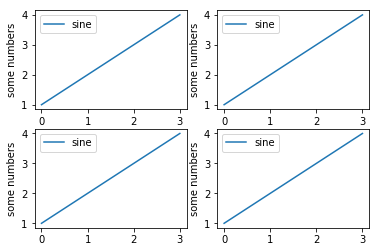

In [79]:
plt.subplot(2, 2, 1)
plt.plot([1,2,3,4],  label='sine')
plt.ylabel('some numbers')
plt.legend(loc='upper left')

plt.subplot(2, 2, 2)
plt.plot([1,2,3,4],  label='sine')
plt.ylabel('some numbers')
plt.legend(loc='upper left')

plt.subplot(2, 2, 3)
plt.plot([1,2,3,4],  label='sine')
plt.ylabel('some numbers')
plt.legend(loc='upper left')

plt.subplot(2, 2, 4)
plt.plot([1,2,3,4],  label='sine')
plt.ylabel('some numbers')
plt.legend(loc='upper left')

plt.show()

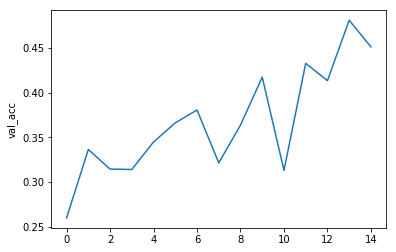

In [8]:
plt.plot(df.val_acc)
plt.plot(df.val_acc)
plt.ylabel("val_acc")
plt.show()

pandas.core.indexes.base.Index

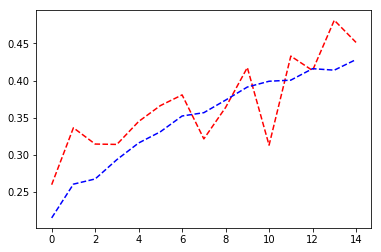

In [14]:
plt.plot(df.val_acc, 'r--')
plt.plot(df.acc, 'b--')
type(df.columns)

In [16]:
def printer(*args):
    print(args)

In [18]:
printer(1, 2,)

(1, 2)


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class My_PlotDisplay():
    def __init__(self, *file_names):
        self.__file_names  = []
        self.__data_frames = []
        self.__design      = ['r--', 'b--', 'g--', 'o--']
        
        for file_name in file_names:
            self.__file_names.append(file_name)
 
        for file_name in self.__file_names:
            self.__data_frames.append(pd.read_csv(file_name))
            print(self.__data_frames[-1].columns)

        #print(self.__data_frames[0].columns)
        #print(self.__data_frames[1].columns)
        columns = len(self.__data_frames[0].columns)
        
        for df in  self.__data_frames:
            if columns- len(df.columns):
                print("Header not matching")
        
    def plot_aganist(self, val):
        file_index = 1
        for df, design  in  zip(self.__data_frames, self.__design):
            plt.plot(df[val], design, label='file_'+str(file_index))
            file_index += 1
        
        plt.ylabel(val)
        plt.legend(loc='best')
        plt.show()

            
    def plot_same(self, *vals, file_number=0):
        for val, design in zip(vals, self.__design):
            plt.plot(self.__data_frames[file_number][val], design, label=val)
            
        plt.ylabel(vals)
        plt.legend(loc='best')
        plt.show()
        
    def plot_same_aganist(self, *vals, file_numbers=[0]):
        rows  = 1
        cols  = len(file_numbers)
        file_index = 1
        #plt.subplots_adjust(hspace=0.4, wspace=0.4)
        
        for file_number in file_numbers:            
            for val, design in zip(vals, self.__design):
                #plt.subplot(rows, cols, file_index)
                plt.plot(self.__data_frames[file_number][val], design, label=val)
            file_index += 1
            
            plt.ylabel(vals)
            plt.legend(loc='best')      
            plt.show() 


In [123]:
#plt_display = My_PlotDisplay('FaceExp_Reco_tr_15_v6_my_logger.csv', 'FaceExp_Reco_tr_15_v5_my_logger.csv','FaceExp_Reco_tr_14_v4_my_logger.csv','FaceExp_Reco_tr_14_v5_my_logger.csv')
plt_display = My_PlotDisplay('FaceExp_Reco_tr_15_v13_my_logger.csv','FaceExp_Reco_tr_15_v12_my_logger.csv','FaceExp_Reco_tr_15_v11_my_logger.csv','FaceExp_Reco_tr_14_v4_my_logger.csv')

Index(['val_loss', 'val_acc', 'val_cce_svm', 'val_rmse_svm',
       'val_cce_rmse_svm', 'loss', 'acc', 'cce_svm', 'rmse_svm',
       'cce_rmse_svm', 'lr', 'opt_name', 'lr.1', 'momentum', 'decay',
       'nesterov', 'g_epoch', 'l_epoch'],
      dtype='object')
Index(['val_loss', 'val_acc', 'val_cce_svm', 'val_rmse_svm',
       'val_cce_rmse_svm', 'loss', 'acc', 'cce_svm', 'rmse_svm',
       'cce_rmse_svm', 'lr', 'opt_name', 'lr.1', 'momentum', 'decay',
       'nesterov', 'g_epoch', 'l_epoch'],
      dtype='object')
Index(['val_loss', 'val_acc', 'val_cce_svm', 'val_rmse_svm',
       'val_cce_rmse_svm', 'loss', 'acc', 'cce_svm', 'rmse_svm',
       'cce_rmse_svm', 'lr', 'opt_name', 'lr.1', 'momentum', 'decay',
       'nesterov', 'g_epoch', 'l_epoch'],
      dtype='object')
Index(['val_loss', 'val_acc', 'val_cce_svm', 'val_rmse_svm',
       'val_cce_rmse_svm', 'loss', 'acc', 'cce_svm', 'rmse_svm',
       'cce_rmse_svm', 'lr', 'opt_name', 'lr.1', 'momentum', 'decay',
       'nesterov', 'g_ep

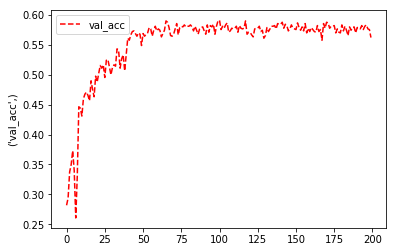

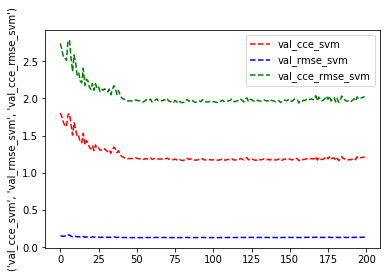

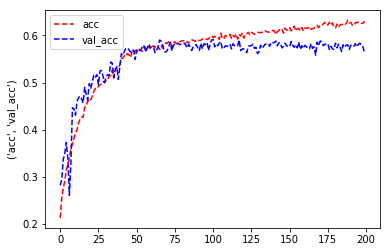

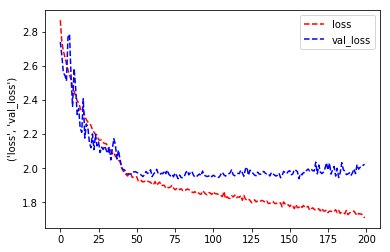

In [124]:
plt_display.plot_same('val_acc',file_number=0)
plt_display.plot_same('val_cce_svm', 'val_rmse_svm', 'val_cce_rmse_svm',file_number=0)
plt_display.plot_same('acc', 'val_acc',file_number=0)
plt_display.plot_same('loss', 'val_loss',file_number=0)

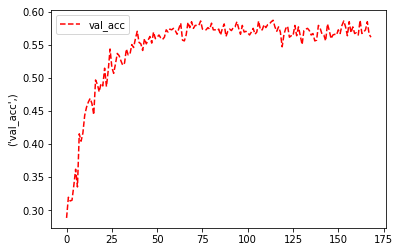

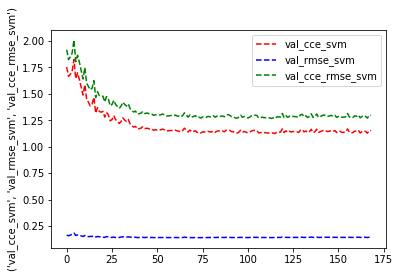

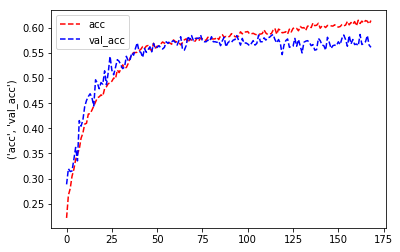

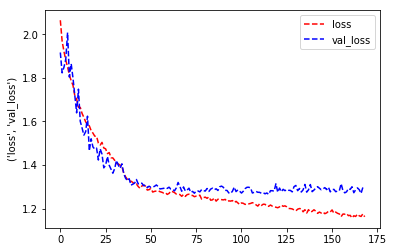

In [125]:
plt_display.plot_same('val_acc',file_number=1)
plt_display.plot_same('val_cce_svm', 'val_rmse_svm', 'val_cce_rmse_svm',file_number=1)
plt_display.plot_same('acc', 'val_acc',file_number=1)
plt_display.plot_same('loss', 'val_loss',file_number=1)

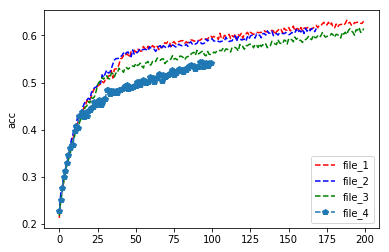

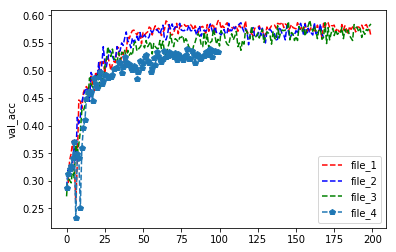

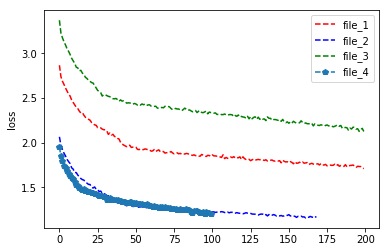

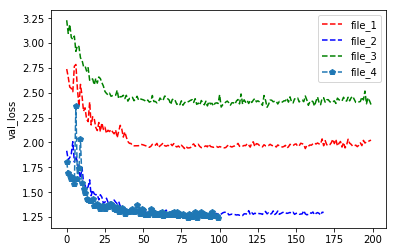

In [126]:

plt_display.plot_aganist('acc')
plt_display.plot_aganist('val_acc')
plt_display.plot_aganist('loss')
plt_display.plot_aganist('val_loss')

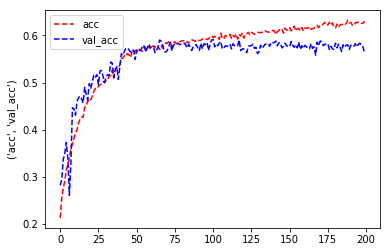

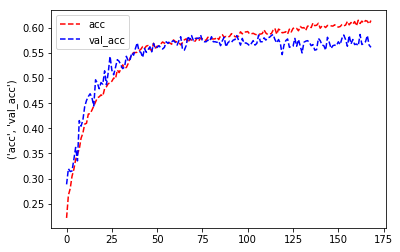

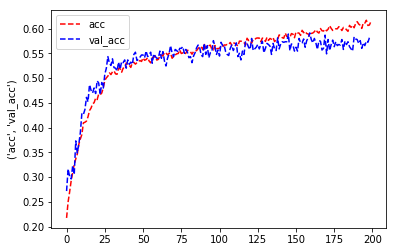

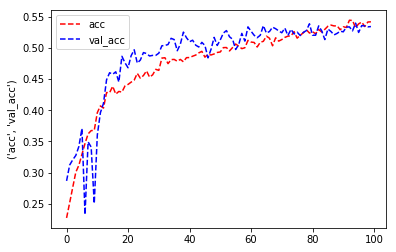

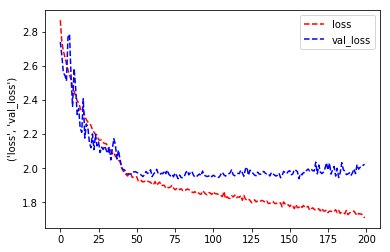

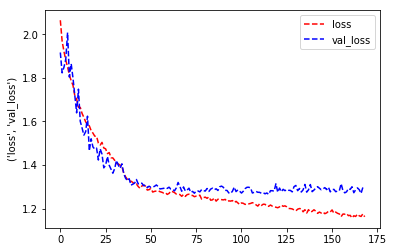

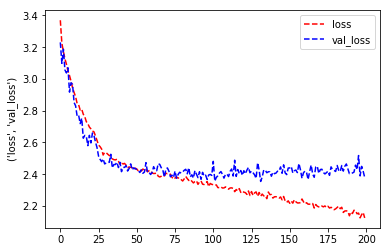

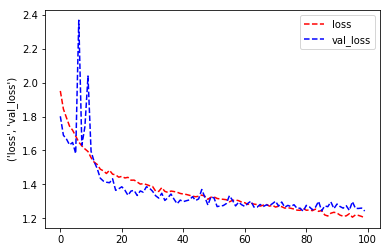

In [128]:
plt_display.plot_same_aganist('acc','val_acc', file_numbers=[0, 1, 2, 3])
#plt_display.plot_same_aganist('val_acc',file_numbers=[0, 1, 2])
#plt_display.plot_same_aganist('loss',file_numbers=[0, 1, 2])
plt_display.plot_same_aganist('loss','val_loss',file_numbers=[0, 1, 2, 3])

In [73]:
#config = model.get_config()
#model = Model.from_config(config)
# or, for Sequential:
#model = Sequential.from_config(config)

In [ ]:
from keras.models import load_model

#new_model = load_model("FaceExp_Reco_tr_08.best.hdf5",custom_objects={'categorical_crossentropy_svm': categorical_crossentropy_svm})
new_model = load_model("FaceExp_Reco_tr_14_.best.hdf5", custom_objects={'categorical_crossentropy_svm': categorical_crossentropy_svm})
score = new_model.evaluate(X_test, Y_test, verbose=1)
print('Public Leader Board Test loss:', score[0])
print('Public Leader Board Test accuracy:', score[1])
score = new_model.evaluate(X_train, Y_train, verbose=1)
print('Training loss:', score[0])
print('Training accuracy:', score[1])